In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('survey_results_public.csv')

C:\Users\gaura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [6]:
df.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [8]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

# Around 80000 people have coding as their hobby

Yes    79897
No     18958
Name: Hobby, dtype: int64


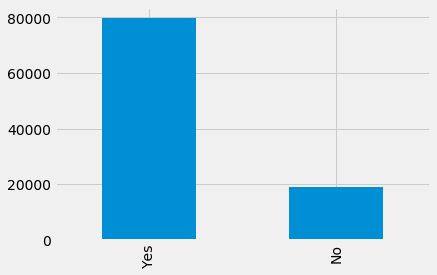

In [9]:
print(df['Hobby'].value_counts())
pd.value_counts(df['Hobby']).plot(kind="bar")

In [10]:
top_10_developer_countries = df['Country'].value_counts()[:10]
top_10_developer_countries.rename(index={'United Kingdom':'UK', 'Russian Federation':'Russia', 'United States':'US'},inplace=True)
top_10_developer_countries

US           20309
India        13721
Germany       6459
UK            6221
Canada        3393
Russia        2869
France        2572
Brazil        2505
Poland        2122
Australia     2018
Name: Country, dtype: int64

Text(0.5,0,'Country')

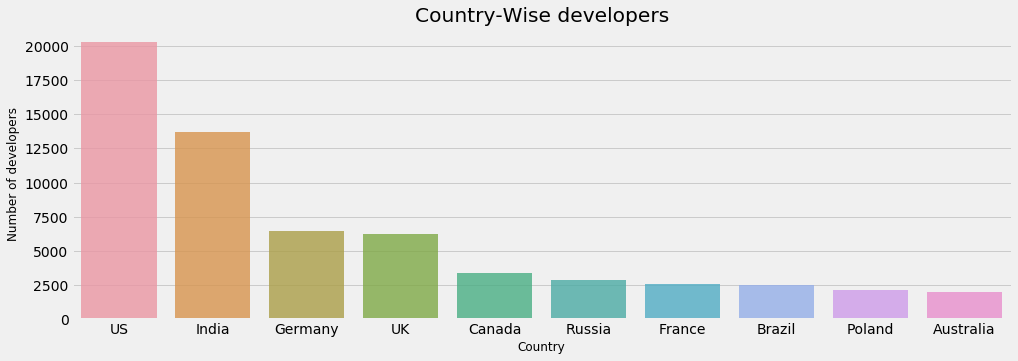

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(top_10_developer_countries.index, top_10_developer_countries.values, alpha=0.8)
plt.title('Country-Wise developers')
plt.ylabel('Number of developers', fontsize=12)
plt.xlabel('Country', fontsize=12)

In [12]:
def cut_string(x):
    x = x.split(' ')
    x = x[:3]
    x = ' '.join(x)
    return x

In [13]:
df.FormalEducation.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

Text(0.5,1,'Formal Education Representation')

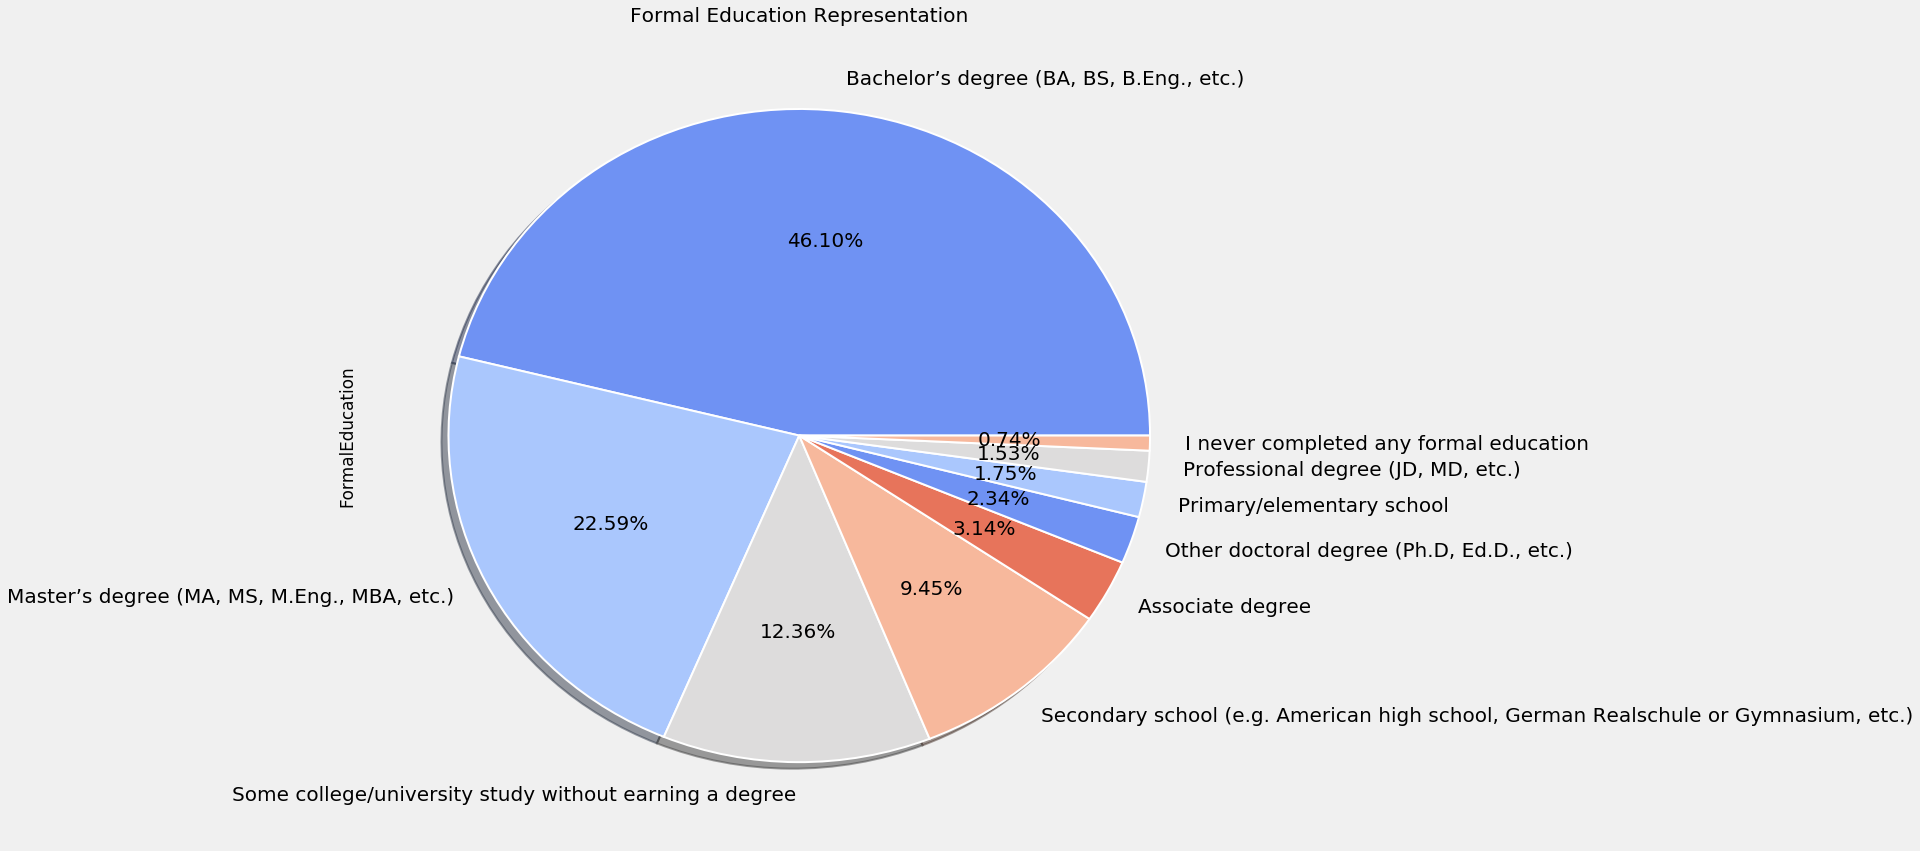

In [14]:
plt.figure(figsize=(14,14))
df["FormalEducation"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm",5),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Formal Education Representation")

## Top 10 Types of Developers

In [15]:
top_10_developer_types = df['DevType'].value_counts()[:10]
# top_10_developer_types.rename(index={'United Kingdom':'UK', 'Russian Federation':'Russia', 'United States':'US'},inplace=True)
top_10_developer_types

Back-end developer                                                              6417
Full-stack developer                                                            6104
Back-end developer;Front-end developer;Full-stack developer                     4460
Mobile developer                                                                3518
Student                                                                         3222
Back-end developer;Full-stack developer                                         3128
Front-end developer                                                             2608
Front-end developer;Full-stack developer                                        1117
Back-end developer;Front-end developer                                          1030
Back-end developer;Front-end developer;Full-stack developer;Mobile developer    1008
Name: DevType, dtype: int64

Text(0.5,1,'Formal Education Representation')

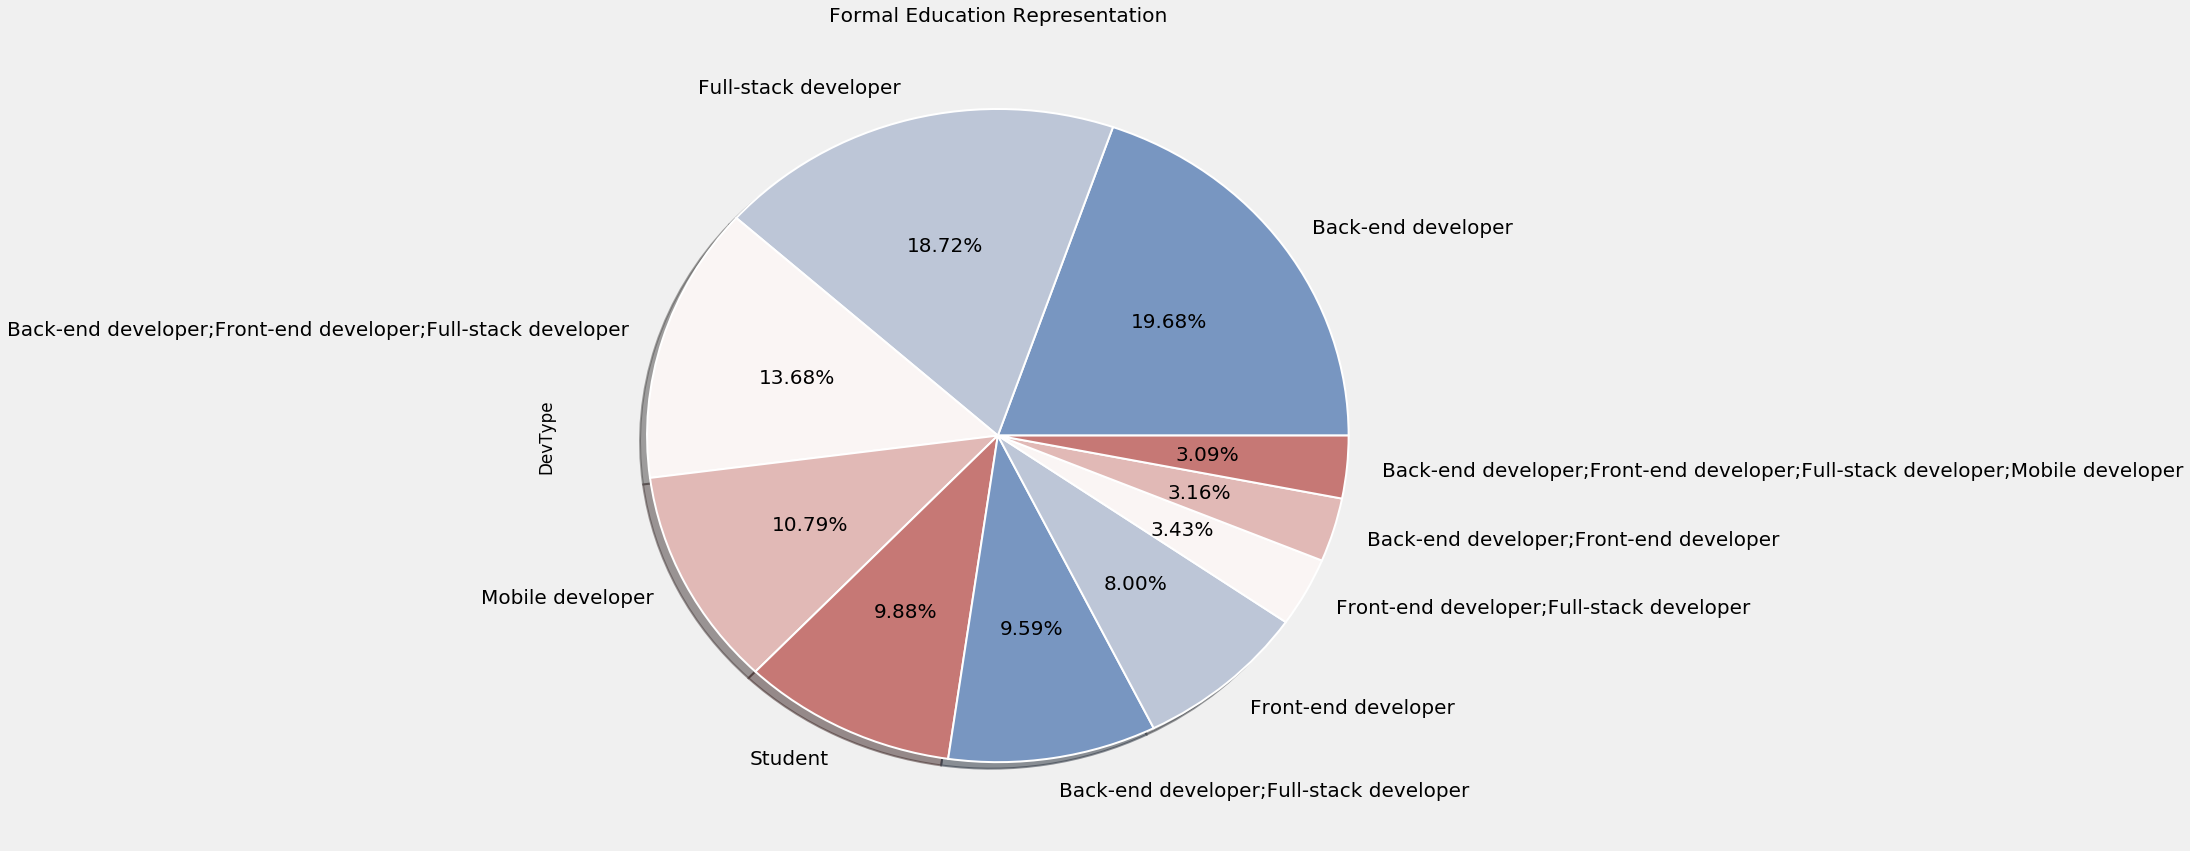

In [36]:
plt.figure(figsize=(14,14))
df["DevType"].value_counts()[:10].plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("vlag",5),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Formal Education Representation")

In [17]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

## Approx. 75% developers have no Formal Education

Text(0.5,1,'Formal Education Representation')

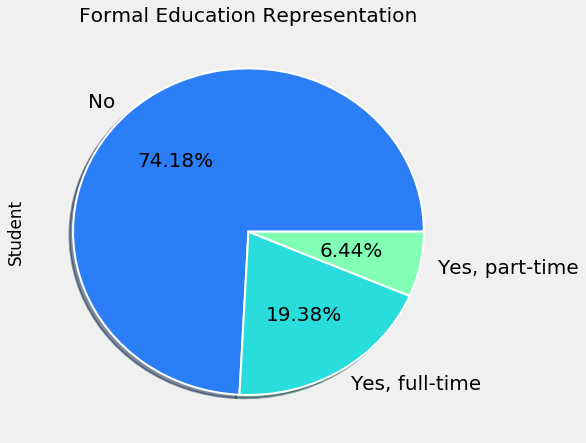

In [18]:
plt.figure(figsize=(7,7))
df["Student"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("rainbow",5),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Formal Education Representation")

In [55]:
df.YearsCoding.unique()
df.JobSatisfaction.unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

## As expected, salaries increase with experience

Text(0.5,1,'Average yearly salaries by coding experience')

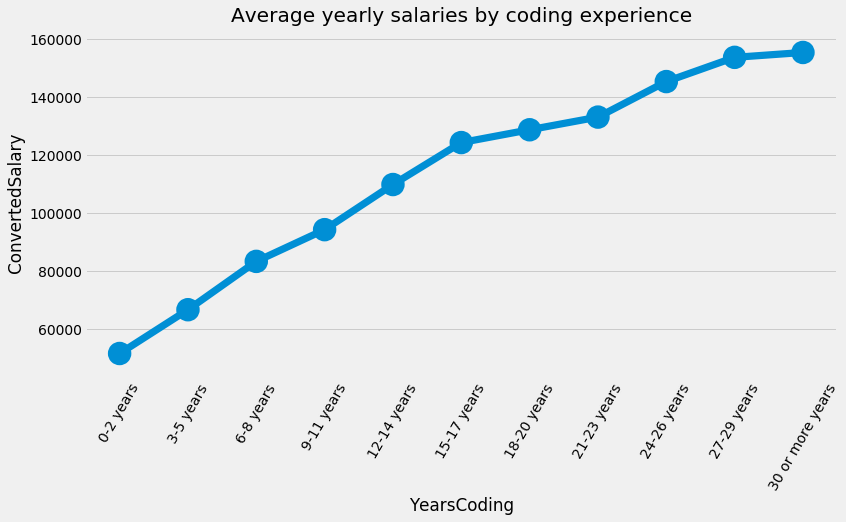

In [113]:
cod_exp = df.groupby("YearsCoding")["ConvertedSalary"].mean().reset_index()

order = ['0-2 years', '3-5 years', '6-8 years', '9-11 years',  '12-14 years','15-17 years', 
         '18-20 years', '21-23 years','24-26 years', '27-29 years','30 or more years']

# cod_exp
plt.figure(figsize=(12,6))
ax = sns.pointplot("YearsCoding","ConvertedSalary",data=cod_exp, pallette="Set2", order=order)
plt.xticks(rotation=60)
# plt.grid(True,alpha=.3,color="white")
plt.title("Average yearly salaries by coding experience")


In [115]:
df.HoursOutside.unique()

array(['1 - 2 hours', '30 - 59 minutes', nan, 'Less than 30 minutes',
       '3 - 4 hours', 'Over 4 hours'], dtype=object)

## Interestingly, people who spend less than 1 hours outside tend to earn more than the rest

Text(0,0.5,'Average Salary')

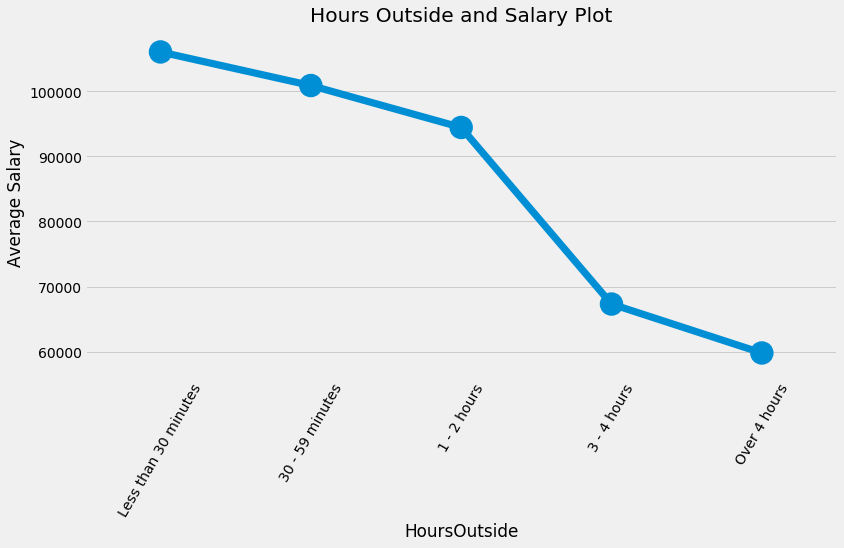

In [128]:
hours_out = df.groupby("HoursOutside")["ConvertedSalary"].mean().reset_index()
hours_out
order = ['Less than 30 minutes', '30 - 59 minutes','1 - 2 hours', '3 - 4 hours' ,  'Over 4 hours']
plt.figure(figsize=(12,6))
ax = sns.pointplot("HoursOutside","ConvertedSalary",data=hours_out, pallette="Set2", order=order)
plt.xticks(rotation=60)
# plt.grid(True,alpha=.3,color="white")
plt.title("Hours Outside and Salary Plot")
plt.ylabel('Average Salary')

In [139]:
# df.Exercise.unique()
df.Exercise.rename(index={'Daily or almost every day':'Daily', 'I don\'t typically exercise':'Does\'nt'}, inplace=True)
df.Exercise.unique()

array(['3 - 4 times per week', 'Daily or almost every day', nan,
       "I don't typically exercise", '1 - 2 times per week'], dtype=object)

In [147]:
print(len(df.LanguageWorkedWith.unique()))
top_10_skill_set = df.LanguageWorkedWith.value_counts()[:10]

26679


## It appears that C#, Javascript, SQL, HTML and CSS are the most trending skills

Text(0.5,0,'Count')

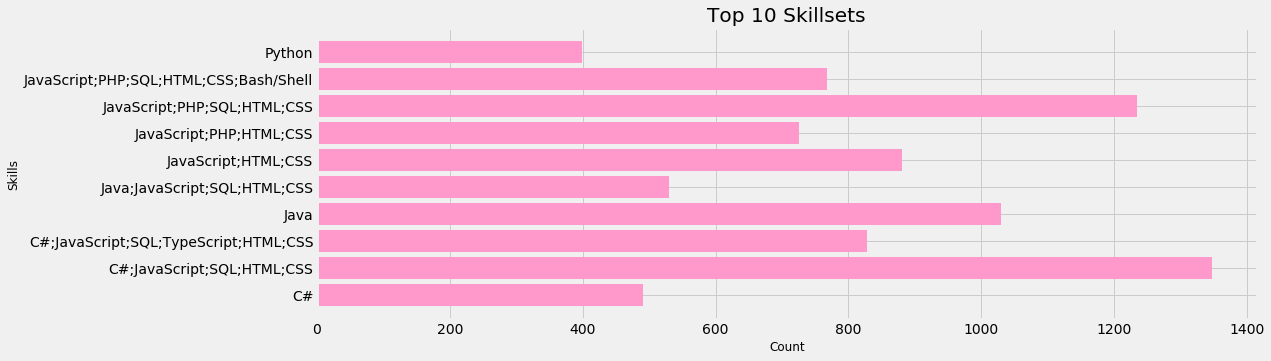

In [164]:
plt.figure(figsize=(15,5))
# sns.barplot(top_10_skill_set.index, top_10_skill_set.values, alpha=0.8)
plt.barh(top_10_skill_set.index, top_10_skill_set.values, color='#ff99cc')
plt.title('Top 10 Skillsets')
plt.ylabel('Skills', fontsize=12)
plt.xlabel('Count', fontsize=12)